<a href="https://colab.research.google.com/github/jonatancisneros/AzureBlobLearning/blob/master/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3

The User Acquisition team asks you to help them find a mix of spend in different advertising campaigns that maximizes the chance of reaching a higher return on investment (ROI). 

The ROI is calculated as revenue / spend. The attachment “task3_campaign_performance.csv” contains past performance information of different campaigns with the following data. 

See the appendix for an explanation of the columns.
https://github.com/jonatancisneros/RovioTest/blob/master/images/task3_dictionary.png
 

**3.1** Prepare 3 portfolios where you maximize the ROI while minimizing the risk. You could think of risk as the standard deviation of the returns of your proposed portfolio (A less volatile portfolio is less risky). 

**3.2** Usually when one scales the spend in a campaign the ROI deteriorates with the scale. How would you account for this effect in your model? (No need for code)

**3.2** Suppose that you want to monitor that the campaigns are reaching the day 360 target. However, for new cohorts you do not know their future revenue at day 360. 

**3.3** How long would you wait to observe the revenue of the cohorts to make a recommendation for adjusting the campaign budget according to the observed performance? (No need for code)


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
#load data 
from google.colab import files 
files.upload()


Saving task3_campaign_performance.csv to task3_campaign_performance.csv


{'task3_campaign_performance.csv': b'registration_date,platform,campaign_id,cohort_age,spend,d7_revenue_mature,d30_revenue_mature,d180_revenue_mature,d360_revenue_mature,target_7,target_30,target_180,target_360\n2018-06-30,iOS,40,396,78.28,57.19105529785156,72.0524673461914,199.66677856445312,251.17356872558597,0.15547917783260345,0.4046192467212677,0.5886042714118958,0.809234619140625\n2018-06-30,iOS,41,396,425.62,50.66259384155274,69.29066467285156,80.96363067626953,106.65557098388672,0.15547917783260345,0.4046192169189453,0.5886042714118958,0.809234619140625\n2018-06-30,iOS,66,396,367.64,10.972461700439453,34.915481567382805,49.87274551391602,52.30220413208008,0.15547917783260345,0.4046192467212677,0.5886042714118958,0.809234619140625\n2018-06-30,iOS,51,396,456.19,26.35519790649414,37.05002212524414,2001.5523681640625,4174.64697265625,0.15547917783260345,0.4046192467212677,0.5886042714118958,0.809234619140625\n2018-06-30,iOS,58,396,196.66,5.352039813995361,6.353892803192139,6.530919

In [0]:
df=pd.read_csv('task3_campaign_performance.csv')

In [83]:
#initial data verification
df.head(100)
df.describe()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3946 entries, 2018-06-30 to 2019-06-29
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   platform             3946 non-null   object 
 1   campaign_id          3946 non-null   int64  
 2   cohort_age           3946 non-null   int64  
 3   spend                3946 non-null   float64
 4   d7_revenue_mature    3946 non-null   float64
 5   d30_revenue_mature   3946 non-null   float64
 6   d180_revenue_mature  2717 non-null   float64
 7   d360_revenue_mature  316 non-null    float64
 8   target_7             3931 non-null   float64
 9   target_30            3931 non-null   float64
 10  target_180           3931 non-null   float64
 11  target_360           3931 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 400.8+ KB


In [84]:
#column treatment

df["registration_date"]= pd.to_datetime(df["registration_date"])
df.set_index(['registration_date'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3946 entries, 2018-06-30 to 2019-06-29
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   platform             3946 non-null   object 
 1   campaign_id          3946 non-null   int64  
 2   cohort_age           3946 non-null   int64  
 3   spend                3946 non-null   float64
 4   d7_revenue_mature    3946 non-null   float64
 5   d30_revenue_mature   3946 non-null   float64
 6   d180_revenue_mature  2717 non-null   float64
 7   d360_revenue_mature  316 non-null    float64
 8   target_7             3931 non-null   float64
 9   target_30            3931 non-null   float64
 10  target_180           3931 non-null   float64
 11  target_360           3931 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 400.8+ KB


In [85]:
df.head()

,platform,campaign_id,cohort_age,spend,d7_revenue_mature,d30_revenue_mature,d180_revenue_mature,d360_revenue_mature,target_7,target_30,target_180,target_360
registration_date,,,,,,,,,,,,
2018-06-30,iOS,40,396,78.28,57.191055,72.052467,199.666779,251.173569,0.155479,0.404619,0.588604,0.809235
2018-06-30,iOS,41,396,425.62,50.662594,69.290665,80.963631,106.655571,0.155479,0.404619,0.588604,0.809235
2018-06-30,iOS,66,396,367.64,10.972462,34.915482,49.872746,52.302204,0.155479,0.404619,0.588604,0.809235
2018-06-30,iOS,51,396,456.19,26.355198,37.050022,2001.552368,4174.646973,0.155479,0.404619,0.588604,0.809235
2018-06-30,iOS,58,396,196.66,5.352040,6.353893,6.530920,6.655556,0.155479,0.404619,0.588604,0.809235


In [0]:
#Create returns for each revenue
df["ROI_7"] = df["d7_revenue_mature"] / df["spend"]
df["ROI_30"] = df["d30_revenue_mature"] / df["spend"]
df["ROI_180"] = df["d180_revenue_mature"] / df["spend"]
df["ROI_360"] = df["d360_revenue_mature"] / df["spend"]


In [103]:
df.groupby(['campaign_id']).sum()

,cohort_age,spend,d7_revenue_mature,d30_revenue_mature,d180_revenue_mature,d360_revenue_mature,target_7,target_30,target_180,target_360,ROI_7,ROI_30,ROI_180,ROI_360
campaign_id,,,,,,,,,,,,,,
0,1050,13911.22930,914.396754,2240.555583,0.000000,0.0,2.449850,6.202028,14.291973,16.565734,1.018650,2.457780,0.000000,0.0
1,2325,28989.51077,1292.826736,2816.237601,0.000000,0.0,5.082579,12.923746,28.883453,33.281587,1.431824,3.030916,0.000000,0.0
2,412,93.74060,0.124492,0.289146,0.000000,0.0,1.319257,3.260694,7.459975,8.750124,0.010429,0.024048,0.000000,0.0
3,2220,2292.51480,366.068804,1395.193583,0.000000,0.0,4.228223,10.912486,23.326682,26.733471,3.729849,14.180460,0.000000,0.0
4,2214,16968.32691,1164.105527,2453.449263,0.000000,0.0,5.360221,14.002899,30.696369,37.783475,3.043098,5.838885,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2652,360.07000,0.000000,0.000000,0.000000,0.0,2.057205,4.743541,11.061157,13.641800,0.000000,0.000000,0.000000,0.0
69,4752,4990.44360,205.907017,819.726611,694.490510,0.0,4.477262,10.597816,22.933505,28.280926,0.988529,4.467039,6.753643,0.0
70,3775,204.58000,26.398386,35.958387,43.107649,0.0,1.575074,3.930413,8.308840,10.875913,1.262038,1.536854,1.892902,0.0


In [88]:
df.head()

,platform,campaign_id,cohort_age,spend,d7_revenue_mature,d30_revenue_mature,d180_revenue_mature,d360_revenue_mature,target_7,target_30,target_180,target_360,ROI_7,ROI_30,ROI_180,ROI_360
registration_date,,,,,,,,,,,,,,,,
2018-06-30,iOS,40,396,78.28,57.191055,72.052467,199.666779,251.173569,0.155479,0.404619,0.588604,0.809235,0.730596,0.920445,2.550674,3.208656
2018-06-30,iOS,41,396,425.62,50.662594,69.290665,80.963631,106.655571,0.155479,0.404619,0.588604,0.809235,0.119032,0.162799,0.190225,0.250589
2018-06-30,iOS,66,396,367.64,10.972462,34.915482,49.872746,52.302204,0.155479,0.404619,0.588604,0.809235,0.029846,0.094972,0.135656,0.142265
2018-06-30,iOS,51,396,456.19,26.355198,37.050022,2001.552368,4174.646973,0.155479,0.404619,0.588604,0.809235,0.057772,0.081216,4.387541,9.151115
2018-06-30,iOS,58,396,196.66,5.352040,6.353893,6.530920,6.655556,0.155479,0.404619,0.588604,0.809235,0.027215,0.032309,0.033209,0.033843


number of Campaigns: 73


Text(0, 0.5, 'ROI_7')

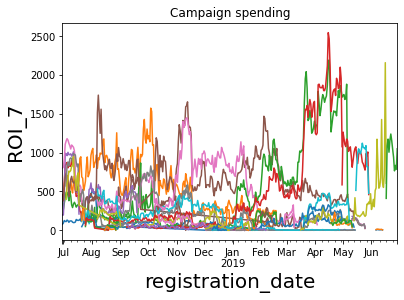

In [89]:
#Show campaigns
title ="Campaign spending"
df["campaign_id"].unique()


number_of_campaigns=df["campaign_id"].nunique()

print("number of Campaigns: " + str(number_of_campaigns))

for c in df["campaign_id"].unique():
  df.query("campaign_id==" + str(c) ).spend.plot()

plt.title(title)
plt.xlabel('registration_date',fontsize=20)
plt.ylabel('ROI_7',fontsize=20)



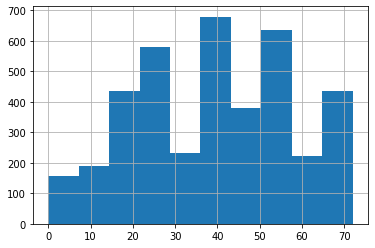

In [13]:
df["campaign_id"].hist()

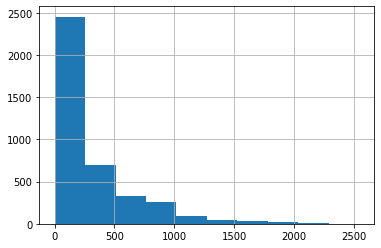

In [0]:


df["spend"].hist()